# Lecture 15: Introduction to nonlinear equations

##  The problem

> Given a continuous function $f(x)$, the problem is to find a point $x^*$ such that $f(x^*) = 0$. That is, $x^*$ is a solution of the equation $f(x) = 0$ and is called a **root of $f(x)$**.

**Examples**

1.  The linear equation $f(x) = a x + b = 0$ has a single solution at $x^* = -\frac{b}{a}$.

2.  The quadratic equation $f(x) = a x^2 + b x + c = 0$ is nonlinear , but simple enough to have a known formula for the solutions

    $$
    x^* = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.
    $$

3.  A general nonlinear equation $f(x) = 0$ rarely has a formula like those above which can be used to calculate its roots.

It is also sometimes better to use a numerical method to solve an equation even if an exact formula exists:

-   the exact formula may have difficulties due to rounding errors;
-   the exact formula may be more expensive to compute.

### Example problems

The following three example problems will be used throughout this section to illustrate the properties of common methods for solving nonlinear equations.

1.  Calculate the value of $x = \sqrt{R}$, where $R$ is some positive real number, without the direct use of any `sqrt` function.

    -   Let $f(x) = x^2 - R$.
    -   The equations $f(x) = 0$ implies that $x^2 = R$, i.e. $x = \pm \sqrt{R}$.
    -   There are two solutions and the method should be able to distinguish between them.

2.  The following formula allows the monthly repayments ($M$) on a compound interest mortgage (for a borrowing of $P$) to be calculated based upon an annual interest rate of $r$% and $n$ monthly payments ([more details](http://www.fonerbooks.com/interest.htm)).

    $$
    M = P \frac{\frac{r}{1200} \left(1 + \frac{r}{1200}\right)^n}{\left(1 + \frac{r}{12000}\right)^n - 1}.
    $$

    -   Suppose that we wish to work out how many monthly repayments of £1,000 would be required to repay a mortgage of £150,000 at an annual rate of 5%.

    -   This would require us to solve $f(n) = 0$ where $f(n) = 1000 - 150000 \frac{\frac{5}{1200}(1+\frac{5}{1200})^n}{(1+\frac{5}{1200})^n - 1}$.

3.  Consider the NACA0012 prototype wing section, which is often used for testing computational methods for simulating flows in aerodynamics:

<video width=50%>
<source src="../video/lec15/naca0012.webm" type="video/mp4">
</video>

Video source: <https://youtu.be/wcahAqSFZ8k>

The profile is given by

$$
y^{\pm}(x) = \pm(0.2969 \sqrt{x} - 0.126 x - 0.3516 x^2 + 0.2843 x^3 - 0.1015 x^4),
$$

in which $+$ gives the upper surface and $-$ gives the lower surface.

Find the point $x$ at which the thickness $t$ of the aerofoil is $0.1$, i.e. solve $f(x) = 0$ where $f(x) = y^+(x) - y^-(x) - 0.1$.

-   There will be two solutions for $x$ for this value of $t$.

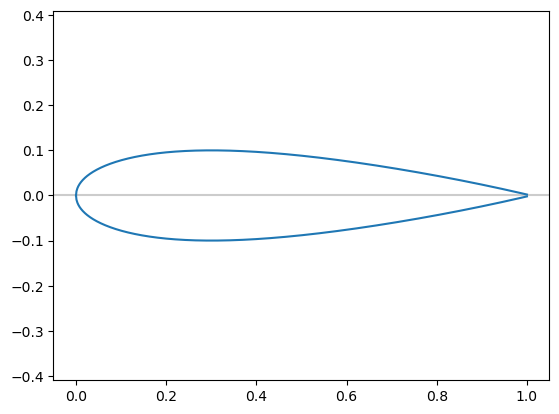

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    yp = (
        -0.1015 * np.power(x, 4)
        + 0.2843 * np.power(x, 3)
        - 0.3516 * np.power(x, 2)
        - 0.126 * x
        + 0.2969 * np.sqrt(x)
    )
    return yp


plt.axhline(0, color="0.8")  # x = 0

t = np.linspace(0, 1, 1000)
p = plt.plot(t, f(t))
plt.plot(t, -f(t), color=p[0].get_color())
plt.axis("equal")

plt.show()

## Iterative methods

Use the concept of **iterative** (or **iterative improvement**) again.

-   Given an initial estimate of the root $x^{(0)}$, try to generate a better approximation $x^{(1)}$ to the root.

-   Once $x^{(1)}$ has been computed, it can be used to compute another estimate $x^{(2)}$ in the same way (and so on...).

-   Generally, $x^{(i)}$ is used to compute $x^{(i+1)}$ (though other previous estimates may be used as well).

-   There are **many** methods for doing this.

### Issues

-   Does the iteration converge?

-   That is, will $x^{(i+1)}$ be a better estimate than $x^{(i)}$?

-   How will we know if this is true or not?

-   If the iteration does converge then how quickly does this happen?

-   How should we decide when to stop the iterative procedure?

## Bisection method

The simplest method for solving $f(x) = 0$, finding $x^*$ such that $f(x^*) = 0$, is known as the **bisection method**.

-   Assume for now that two points $x_L$ and $x_R$ are known for which

    $$
    f(x_L) f(x_R) < 0
    $$

	i.e., the function evaluations at these points are of opposite sign.

-   If $f$ is continuous then this implies that there must be at least one root $x^*$ in the interval $(x_L, x_R)$. There may be more than one root.

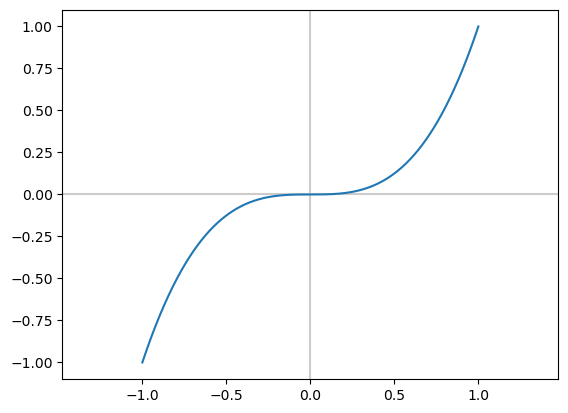

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


plt.axvline(0, color="0.8")  # y = 0
plt.axhline(0, color="0.8")  # x = 0

t = np.linspace(-1, 1, 1000)
p = plt.plot(t, t**3)
plt.axis("equal")

plt.show()

### The algorithm

-   Consider the point $x_C = (x_L + x_R) / 2$ and find $f(x_C)$.

    -   If $f(x_C) = 0$, then $x^* = x_C$ and we can stop.
    -   If $f(x_L) f(x_C) < 0$, then $x^* \in (x_L, x_C)$.
    -   If $f(x_C) f(x_R) < 0$, then $x^* \in (x_C, x_R)$.

-   Replace the interval (also termed **bracket**) $(x_L, x_R)$ with the new interval containing $x^*$.

    -   Note that in one step the length of the interval containing $x^*$ has been halved.

-   Repeat this process until $x_R - x_L < TOL$, where $TOL$ is a user-supplied value, i.e. repeat until the bracket is sufficiently small.

### Convergence analysis

-   Assume that $k$ steps are taken from an initial bracket $(a, b)$.

-   At each step the bracketing interval is halved.

-   So, after $k$ steps the length of the interval will be $\dfrac{b-a}{2^k}$.

-   For large $b-a$ (a large initial bracket) or small $TOL$ (high accuracy required) $k$ will be large.

-   Note that once $x_R - x_L < TOL$, we can estimate $x^* = (x_L + x_R)/2$, in which case the absolute error will be at most $\frac{1}{2} TOL$.

### Example 1

Use the bisection method to calculate $\sqrt{2}$ with an error of less than $10^{-4}$.

-   Use $R = 2$, so $f(x) = x^2 - 2$, which gives $x^* = \sqrt{2}$.
-   Set the initial bracket to be $[a, b] = [0, 2]$ and the error tolerance to be $TOL = 10^{-4}$.

In [3]:
def f(x):
    return x * x - 2


a = 0
b = 2
tol = 1.0e-4

fa = f(a)
fb = f(b)

it = 0

headers = ["it", "a", "b", "f(a)", "f(b)", "update"]
data = []

while b - a > tol:
    new_data = [it, a, b, f(a), f(b)]

    c = (a + b) / 2
    fc = f(c)

    if fa * fc < 0:
        b = c
        fb = fc

        new_data.append(f"b := {c:.4f}")
    else:
        a = c
        fa = fc

        new_data.append(f"a := {c:.4f}")

    data.append(new_data)
    it += 1

import pandas as pd

df = pd.DataFrame(data, columns=headers)
df.style.hide_index().set_caption("Results of bisection method on example 1")

AttributeError: 'Styler' object has no attribute 'hide_index'

Note that

-   choosing $[a, b] = [-2, 0]$ results in $x^* = -1.4142$;
-   if $[a, b]$ brackets *both* roots, $\pm \sqrt{R}$, then $f(x_L) f(x_R) > 0$ and the bisection method cannot start.

Which roots, if any will the following initial intervals converge to?

$$
[0,1] \qquad
[2, 10] \qquad
[-10, 10] \qquad
[-10, -1].
$$

### Example 2

Use the bisection method to calculate the number of monthly repayments of £1,000 that are required to repay a mortgage of £150,000 at an annual rate of 5%.

It is clear that 1 monthly repayment ($n=1$) will not be sufficient, whilst we should try a very large value of $n$ to try to bracket the correct solution.

In [ ]:
M = 1000
P = 150000
r = 5


def f(x):
    return M - P * ((r / 1200) * (1 + r / 1200) ** x) / ((1 + r / 1200) ** x - 1)


a = 1
b = 1000
tol = 0.1

fa = f(a)
fb = f(b)

it = 0

headers = ["it", "a", "b", "f(a)", "f(b)", "update"]
data = []

while b - a > tol:
    new_data = [it, a, b, f(a), f(b)]

    c = (a + b) / 2
    fc = f(c)

    if fa * fc < 0:
        b = c
        fb = fc

        new_data.append(f"b := {c:.4f}")
    else:
        a = c
        fa = fc

        new_data.append(f"a := {c:.4f}")

    data.append(new_data)
    it += 1

import pandas as pd

df = pd.DataFrame(data, columns=headers)
df.style.hide_index().set_caption("Results of bisection method on example 2")

We converges to a solution of $x^* = 235.9$ after 13 iterations.

Note that if we do not try a sufficiently large value for $n$ for the upper range of the bracketing interval the method will fail.

### Example 3

Use the bisection method to find the points at which the thickness of the NACA0012 aerofoil is 0.1 with an error of less than $10^{-4}$.

It can be seen that $0 \le x^* \le 1$ but there are two solutions in this interval, so try $[x_L, x_R] = [0.5, 1]$ as the initial bracket.

In [ ]:
import numpy as np


def f(x):
    yp = (
        -0.1015 * np.power(x, 4)
        + 0.2843 * np.power(x, 3)
        - 0.3516 * np.power(x, 2)
        - 0.126 * x
        + 0.2969 * np.sqrt(x)
    )
    t = 0.1
    return yp - 0.5 * t


a = 0.5
b = 1.0
tol = 1.0e-4

fa = f(a)
fb = f(b)

it = 0

headers = ["it", "a", "b", "f(a)", "f(b)", "update"]
data = []

while b - a > tol:
    new_data = [it, a, b, f(a), f(b)]

    c = (a + b) / 2
    fc = f(c)

    if fa * fc < 0:
        b = c
        fb = fc

        new_data.append(f"b := {c:.4f}")
    else:
        a = c
        fa = fc

        new_data.append(f"a := {c:.4f}")

    data.append(new_data)
    it += 1

import pandas as pd

df = pd.DataFrame(data, columns=headers)
df.style.hide_index().set_caption("Results of bisection method on example 3")

This gives the root as $x^* \approx 0.7652$ after 12 iterations.

Note that:

-   taking $[x_L, x_R] = [0, 0.5]$ gives the other root $x^* \approx 0.0339$;
-   taking $[x_L, x_R] = [0, 1]$ or $[x_L, x_R] = [0.1, 0.6]$ would fail to give an initial bracket.

### Weaknesses of the bisection algorithm

-   Bisection is a reliable method for finding solutions of $f(x) = 0$ provided an initial bracket can be found.

-   It is far from perfect however:

    -   finding an initial bracket is not always easy;
    -   it can take a very large number of iterations to obtain an accurate answer;
    -   it can never find solutions of $f(x) = 0$ for which $f$ does not change sign.

For example:

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.axhline(0, color="0.8")  # x = 0
plt.axvline(0, color="0.8")  # y = 0

x = np.linspace(-1, 1)
y = (x - 0.2) ** 2

plt.plot(x, y)
plt.show()

## Newton's method

-   **Newton's method** (or the **Newton-Raphson iteration**) is an alternative algorithm for solving $f(x) = 0$.

-   On the positive side:

    -   it does not require an initial bracket - just an initial iterate;
    -   it converges much more quickly than bisection;
    -   it can solve problems where the solution is also a turning point (see previous example).

-   On the negative side:

    -   it is not guaranteed to converge (unlike bisection with a good initial bracket).

### Graphical derivation of Newton's method

$x^{(i+1)}$ is computed by projecting the *slope* at $x^{(i)}$, $f'(x^{(i)})$, on to the $x$-axis, giving

$$
\begin{aligned}
f'(x^{(i)}) & = \frac{f(x^{(i)}) - 0}{x^{(i)} - x^{(i+1)}} \\
\Rightarrow
x^{(i+1)} & = x^{(i)} - \frac{f(x^{(i)})}{f'(x^{(i)})}.
\end{aligned}
$$

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.axhline(0, color="0.8")  # x = 0
plt.axvline(0, color="0.8")  # y = 0

f = lambda t: t**2 - 0.2
df = lambda t: 2 * t

x = np.linspace(0, 1)
y = f(x)

plt.plot(x, y)

x0 = 0.8
f0 = f(x0)

p0 = plt.plot(x0, f0, "o")
color = p0[0].get_color()
plt.plot([x0, x0, 0], [0, f0, f0], color=color, linestyle="--")

x1 = x0 - f0 / df(x0)
f1 = f(x1)

tgt0 = f(x0) + (x - x0) * df(x0)
pt0 = plt.plot(x, tgt0)
color = pt0[0].get_color()
plt.plot(x1, 0, "o", color=color)

plt.text(
    x0 + 0.03,
    f0 + 0.01,
    "slope at $x^{(0)}$",
    fontsize=10,
    color=color,
)

p1 = plt.plot(x1, f1, "o")
color = p1[0].get_color()
plt.plot([x1, x1, 0], [0, f1, f1], color=color, linestyle="--")

plt.xticks([x0, x1], ["$x^{(0)}$", "$x^{(1)}$"])
plt.yticks([f0, f1], ["$f(x^{(0)})$", "$f(x^{(1)})$"])

plt.xlim([0, 1])
plt.ylim([-0.2, 0.8])

plt.show()

### Notes

-   The formula $x^{(i+1)} = x^{(i)} - \frac{f(x^{(i)})}{f'(x^{(i)})}$ requires an initial guess at the solution: $x^{(0)}$.

-   In order to apply Newton's method we need to be able to compute an expression for the derivative of $f(x)$:

    -   this may not always be possible or easy;
    -   in the examples that follow we will make use of the formula:

	    $$
        f(x) = x^n \Rightarrow f'(x) = n x^{n-1},
        $$

		which is true for any $n \neq 0$.

-   There are variants of Newton's method that allow the derivative to be approximated: we will return to these later.

### Examples

Write out an expression for the Newton iteration for each of the following functions $f(x)$ and then carry out 2 iterations using the resulting iteration and the given initial value $x^{(0)}$.

1.  $f(x) = x^2 - 5$ with $x^{(0)} = 2$.

	This gives $f'(x) = 2x$ so the iterative formula is

	$$
	x^{(i+1)}
	= x^{(i)} - \frac{(x^{(i)})^2 - 5}{2 x^{(i)}}
	= \frac{(x^{(i)})^2 + 5}{2 x^{(i)}}.
	$$

	This gives

	$$
	\begin{aligned}
	x^{(1)}
	& = \frac{2^2 + 5}{2 \times 2}
	= \frac{9}{4} = 2.25 \\
	x^{(2)}
	& = \frac{(\frac{9}{4})^2 + 5}{2 \times \frac{9}{4}}
	= \frac{161}{72} \approx 2.23611
	\end{aligned}
	$$

	(Note $\sqrt{5} = 2.23607$)


2.  $f(x) = x^3 - 2x - 5$ with $x^{(0)} = 2$. (homework)

3.  $f(x) = x^3 - 2$ with $x^{(0)} = 1$. (homework)

## Summary

-   Bisection approach is a simple and reliable algorithm for solving a nonlinear equation.

-   An appropriate initial bracket must be found - some searching may be required to locate one.

-   The analysis shows that the method is not very fast.

-   Newton's method is an alternative approach:

    -   it does not require an initial bracket - just an initial iterate;
    -   it converges much more quickly than bisection;
    -   it can solve problems where the solution is also a turning point;

-   We will discuss some drawbacks of Newton's method next time...

## Further reading

- Maths is fun: [Quadratic equation](https://www.mathsisfun.com/algebra/quadratic-equation.html)
- John D Cook, "[The quadratic formula and low-precision arithmetic](https://www.johndcook.com/blog/2018/04/28/quadratic-formula/)"

- Wikipedia: [Root finding algorithms](https://en.wikipedia.org/wiki/Root-finding_algorithms)
- Wikipedia: [Bisection method](https://en.wikipedia.org/wiki/Bisection_method)
- Wikipedia: [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method)
- X-engineer: [Bisection method for root finding](https://x-engineer.org/bisection-method/)

The [slides used in the lecture](./lec15_.ipynb) are also available